# Exercise sheet 10
**Hello everyone!**

**Points: 15**

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "10-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *10-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 08.05.2023 <br>
**Submission date**: 16.05.2023 <br>

### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

In [2]:
import otter
grader = otter.Notebook()

<p><a href="https://commons.wikimedia.org/wiki/File:Basel_-_M%C3%BCnsterpfalz3.jpg#/media/Datei:Basel_-_Münsterpfalz3.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Basel_-_M%C3%BCnsterpfalz3.jpg" alt="Basler Münster mit Pfalz und der Mittleren Rheinbrücke" height="486" width="1280"></a></p>

# Basel's neighborhoods
We are working with a dataset containing information about Basel and its neighborhoods. You can find it here: https://opendata.swiss/de/dataset/kennzahlen-zu-den-basler-wohnvierteln-und-landgemeinden. It's also uploaded as a csv to this folder.

In [3]:
bs = pd.read_csv("basel_neighborhoods.csv", sep=";")
bs.head()

,publikationsjahr,wohnviertel_id,wohnviertel_name,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,...,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,2015,1,Altstadt Grossbasel,0.017115,0.251426,0.517930,0.324463,0.777778,0.297921,0.328851,...,1825.400406,0.101626,0.066693,90.808059,55.739958,4297.479726,15795.731129,0.824263,4.354447,0.019072
1,2015,2,Vorstädte,0.031635,0.353328,0.532251,0.345813,0.636364,0.374726,0.279170,...,1899.097967,0.075786,0.194198,81.803421,51.200218,4902.317140,14894.945946,0.779869,4.530718,0.023471
2,2015,7,Bruderholz,0.017662,0.229827,0.458660,0.166817,0.608108,0.442465,0.427310,...,1948.410577,0.734615,0.713769,109.383218,50.067809,8585.686671,18103.101406,0.752834,0.130144,0.023127
3,2015,8,Bachletten,0.022092,0.210320,0.455482,0.224974,0.609137,0.374629,0.421825,...,1934.025590,0.561775,0.408619,93.179580,47.396467,1632.650810,11363.577884,0.790006,0.190061,0.023636
4,2015,10,Iselin,0.089462,0.360277,0.445545,0.284152,0.262357,0.260469,0.331530,...,1937.165632,0.167702,0.375125,68.638626,37.648552,425.867934,6405.308048,0.701177,0.155020,0.042679


## Question 1) P value (10 points)
Let's see if there's an answer to the following question: Did the amount of green spaces in Basel's neighborhoods increase *significantly* between 2015 and 2021? <br>

The column that measures the amount of green spaces (parks and such) is called "*anteil_gruenflaechen*".

### 1a) Observed difference (1 point)
What is the observed difference between the mean of the amount of green spaces in 2015 and in 2021? <br>
Assign the mean of the amount of green spaces for the years 2015 and 2021 to the variables mean_2015 and mean_2021 respectively.

(Hint: You can average over all neighborhoods)

In [4]:
bs_2015 = bs[bs['publikationsjahr'] == 2015].sort_values('wohnviertel_name').reset_index(drop=True)
bs_2021 = bs[bs['publikationsjahr'] == 2021].sort_values('wohnviertel_name').reset_index(drop=True)
mean_2015 = bs_2015['anteil_gruenflaechen'].mean()
mean_2021 = bs_2021['anteil_gruenflaechen'].mean()

print(mean_2021 - mean_2015)

0.010221135919047664


In [5]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b) Artificial variables (3 points)
Let's make a new dataframe called "*neighborhoods*" containing the neighborhoods of Basel in a column called "*wohnviertel_name*". Additionally, it should have a column called "increase_green_space" that has 
* the number 1 if the amount of green space increased between 2015 and 2021 for this neighborhood
* the number 0 otherwise

In [6]:
neighborhoods = bs_2021['wohnviertel_name'].to_frame()
neighborhoods['increase_green_space'] = np.less(bs_2015['anteil_gruenflaechen'], bs_2021['anteil_gruenflaechen']).astype(int)

neighborhoods.head()

,wohnviertel_name,increase_green_space
0,Altstadt Grossbasel,0
1,Altstadt Kleinbasel,0
2,Am Ring,1
3,Bachletten,1
4,Bettingen,0


In [7]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c) Amount of neighborhoods with an increase in green spaces (2 points)

We want to verify if there was an increase or decrease in green spaces. For this we work under the null hypothesis:
$$ \mathbb{P}(\text{green spaces increase}) -0.5 = 0. $$


What is the percentage of neighborhoods that had an increase in green spaces from 2015 to 2021? Save this decimal number (float) in the variable called "*increase_2021*". This value will let us calculate the difference to our null hypothesis value since it is our $ \mathbb{P}(\text{green spaces increase})$. Assigne the difference of increase_2021 to our null hypothesis value (0.5) to the variable called "*difference_null_hypothesis*" (float).

In [8]:
increase_2021 = neighborhoods[neighborhoods['increase_green_space'] == 1].shape[0] / neighborhoods.shape[0]
difference_null_hypothesis = increase_2021 - 0.5
print(increase_2021, difference_null_hypothesis)

0.5714285714285714 0.0714285714285714


In [9]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

### 1d) Calculate the p value (3 points)
What is the p value for there being a significant difference in the amount of green space between 2015 and 2021? <br>
In other words: What is the p value for $P(|\text{mean\_2021} - 0.5| > \text{observed\_difference})$?

Assign the p-vlaue to the variable called "*p_value*".

Hint: Have a look at the slides from lecture 8 to find an example.

In [10]:
t = np.sqrt(neighborhoods.shape[0])*difference_null_hypothesis/0.5
p_value = 1 - (norm.cdf(t) - norm.cdf(-t))
p_value

0.5126907602619235

In [11]:
grader.check("Question 1d")

Question 1d results: All test cases passed!

### 1e) Do we reject or fail to reject the null hypothesis based on our p value? (1 points)
Here our significance value is 0.05.

Please write your answer like this:
* If we reject the null hypothesis: null_hypothesis = "reject"
* If we can not reject the null hypothesis: null_hypothesis = "fail to reject"

(Hint: Read the question carefully and google it if you're not sure what it means:https://statisticsbyjim.com/hypothesis-testing/failing-reject-null-hypothesis/)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 1e      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

In [12]:
print(p_value <= 0.05)
null_hypothesis = "fail to reject"

False


<!-- END QUESTION -->



## Question 2) Regression (5 points)
### 2a) Plot correlation (2 points)
Make a plot that shows you how income tax (*einkommenssteuer_pro_veranlagung*) and apartment size (*flaeche_pro_wohnung*) are correlated in the year 2021 i.e: make a scatter plot for the year 2021 with *einkommenssteuer_pro_veranlagung* on the *x*-axis and  *flaeche_pro_wohnung* on the *y*-axis.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2a      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 2     # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

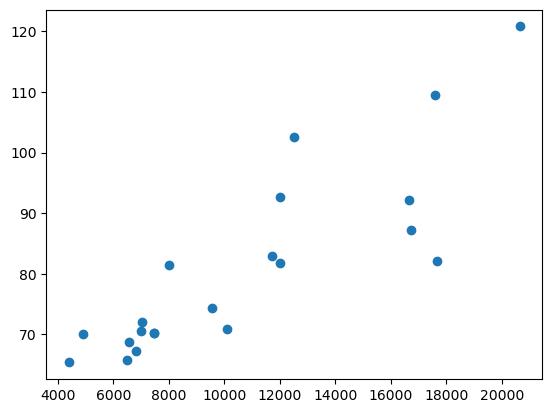

In [13]:
plt.scatter(bs_2021['einkommenssteuer_pro_veranlagung'], bs_2021['flaeche_pro_wohnung'])

<!-- END QUESTION -->



### 2b) Correlation coefficient (1 point)
What is the correlation coefficient between income tax and apartments size in Basel for 2021? Assign this number (float) to the variable called "*corr_coeff*".

In [14]:
corr_coeff = bs_2021['einkommenssteuer_pro_veranlagung'].corr(bs_2021['flaeche_pro_wohnung'])
corr_coeff

0.8537433905040709

In [15]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

### 2c) Plot another correlation (1 point)
Make a plot that shows you how living space per person (*wohnflaeche_pro_person*) and apartment size (*flaeche_pro_wohnung*) are correlated (a scatter plot) for the year 2021.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Question 2c      # (required) the path to a requirements.txt file
manual: true     # whether this is a manually-graded question
points: 1    # how many points this question is worth; defaults to 1 internally
check_cell: false  # whether to include a check cell after this question (for autograded questions only)
-->

Text(0, 0.5, 'Apartment size')

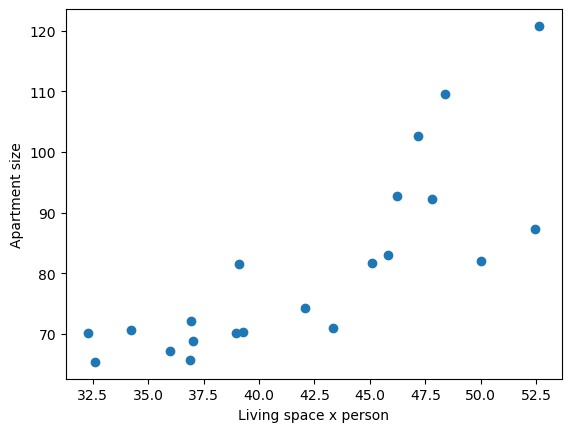

In [16]:
plt.scatter(bs_2021['wohnflaeche_pro_person'], bs_2021['flaeche_pro_wohnung'])
plt.xlabel('Living space x person')
plt.ylabel('Apartment size')

<!-- END QUESTION -->



What do you notice on this plot, what kind of correlation do you observe? What could be problematic about this correlation?
Write your answer in the cell below as a comment (use #).

In [17]:
'''
The correlation isn't linear but exponential. In addition, it can be seen that from 45m²/pers. the correlation splits in two and follows different "trends".
The first higher going to p_1 = (52.5, 120) and the other ending at p_2 = (52.5, 90).
'''

'\nThe correlation isn\'t linear but exponential. In addition, it can be seen that from 45m²/pers. the correlation splits in two and follows different "trends".\nThe first higher going to p_1 = (52.5, 120) and the other ending at p_2 = (52.5, 90).\n'

### 2d) Expectations (1 points)
What is the expected value $\hat E$ (mean) for the amount of living space for a random person (*wohnflaeche_pro_person*) living in Basel in 2021?

Assign this value (float) to the variable called "*living_space*".

In [18]:
living_space = bs_2021['wohnflaeche_pro_person'].mean()

In [19]:
grader.check("Question 2d")

Question 2d results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [20]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 1d results: All test cases passed!

Question 2b results: All test cases passed!

Question 2d results: All test cases passed!